In [2]:
# Step 1: Load and Prepare the Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset from sklearn
wine = datasets.load_wine()

# Review the dataset details
print("Dataset Features:\n", wine.feature_names)
print("\nDataset Classes:\n", wine.target_names)
print("\nClass Distribution:\n", pd.Series(wine.target).value_counts())

# Prepare the data
X = wine.data  # Features
y = wine.target  # Target (Classes)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset Features:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Dataset Classes:
 ['class_0' 'class_1' 'class_2']

Class Distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [3]:
# Step 2: Implement K-Nearest Neighbors (KNN) for different k values
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

# Loop through different k values and record the accuracy for each
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(accuracy_knn)

In [4]:
# Step 3: Implement Radius Neighbors (RNN) for different radius values
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

# Loop through different radius values and record the accuracy for each
for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius)
    rnn.fit(X_train, y_train)
    y_pred_rnn = rnn.predict(X_test)
    accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_accuracies.append(accuracy_rnn)


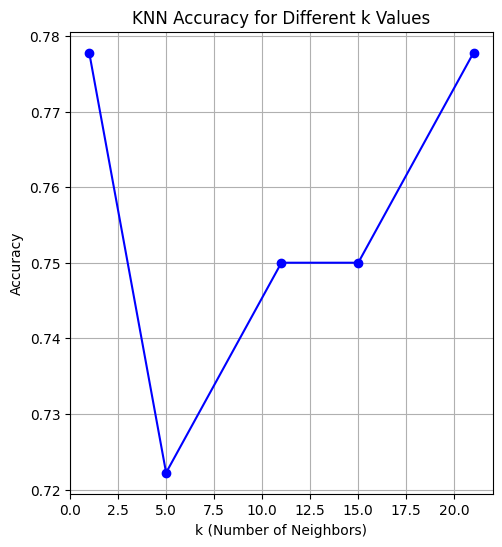

In [5]:
# Step 4: Visualize and Compare Results

# Create a plot for KNN accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', color='b', linestyle='-', label='KNN Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)


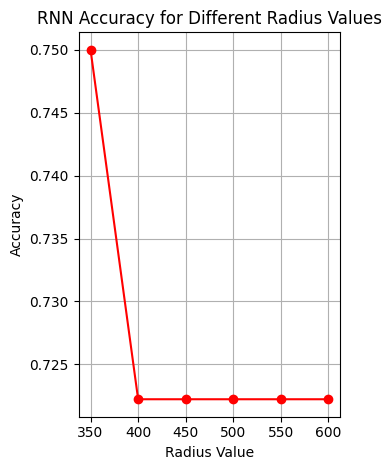

In [6]:
# Create a plot for RNN accuracies
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='o', color='r', linestyle='-', label='RNN Accuracy')
plt.title('RNN Accuracy for Different Radius Values')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [8]:
# Step 5: Comparison and Conclusion
best_knn_accuracy = max(knn_accuracies)
best_rnn_accuracy = max(rnn_accuracies)

print(f"Best KNN Accuracy: {best_knn_accuracy:.4f} with k = {k_values[knn_accuracies.index(best_knn_accuracy)]}")
print(f"Best RNN Accuracy: {best_rnn_accuracy:.4f} with radius = {radius_values[rnn_accuracies.index(best_rnn_accuracy)]}")


Best KNN Accuracy: 0.7778 with k = 1
Best RNN Accuracy: 0.7500 with radius = 350


#Summary
In this analysis, we explored the performance of K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers using the Wine dataset, which consists of three classes of wine, each characterized by chemical properties such as alcohol, malic acid, and magnesium. We experimented with different parameter values for both models to assess their impact on classification accuracy.

The KNN classifier achieved its best accuracy of 0.7778 with k = 1, indicating that a smaller number of neighbors helped improve performance. On the other hand, the RNN classifier reached a best accuracy of 0.7500 with a radius = 350, showcasing a solid performance for this radius value.

Comparing the two models, KNN performed slightly better in this case. However, the choice between KNN and RNN depends on the nature of the dataset, where KNN may be more suitable when class boundaries are well-defined, while RNN can be beneficial in handling varying densities in the data.


